In [31]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import altair as alt
# Optional in Jupyter Notebook: requires an up-to-date vega nbextension.
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
sentiment_by_words = pd.read_csv("data/sentiment_by_review_words.tsv", sep="\t")

In [3]:
len(sentiment_by_words)

4500

In [4]:
ratings = list(sentiment_by_words["rating"])
reviews = list(sentiment_by_words["review"])
reviews = [str(e) for e in reviews]
sentiment = list(sentiment_by_words["sentiment_by_review_words"])

4500

In [9]:
# classifying rating
# 4,5 treated as positive
# 1,2  treated as negative
# 3 treated as neutral
def classify_rating(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"


# classify sentiment
# greater than 0.2 -> positive
# -.2 to .2 -> neutral
# less than -.2 negative
def classify_sentiment(sentiment):
    if sentiment > 0.2:
        return "positive"
    elif -0.2 <= sentiment <= 0.2:
        return "neutral"
    else:
        return "negative"

In [10]:
rating_classes = [classify_rating(rating) for rating in ratings]
sentiment_values = [classify_sentiment(sent) for sent in sentiment]

In [17]:
acc = accuracy_score(rating_classes, sentiment_values)
print(acc)

0.1922222222222222


In [20]:
target_names = ["negative", "neutral", "positive"]
print(
    classification_report(rating_classes, sentiment_values, target_names=target_names)
)

              precision    recall  f1-score   support

    negative       0.83      0.03      0.06      1500
     neutral       0.12      0.95      0.21       500
    positive       0.84      0.14      0.23      2500

    accuracy                           0.19      4500
   macro avg       0.60      0.37      0.17      4500
weighted avg       0.76      0.19      0.17      4500



In [29]:
cm = confusion_matrix(rating_classes, sentiment_values, labels=target_names)
cm

array([[  50, 1405,   45],
       [   3,  477,   20],
       [   7, 2155,  338]], dtype=int64)

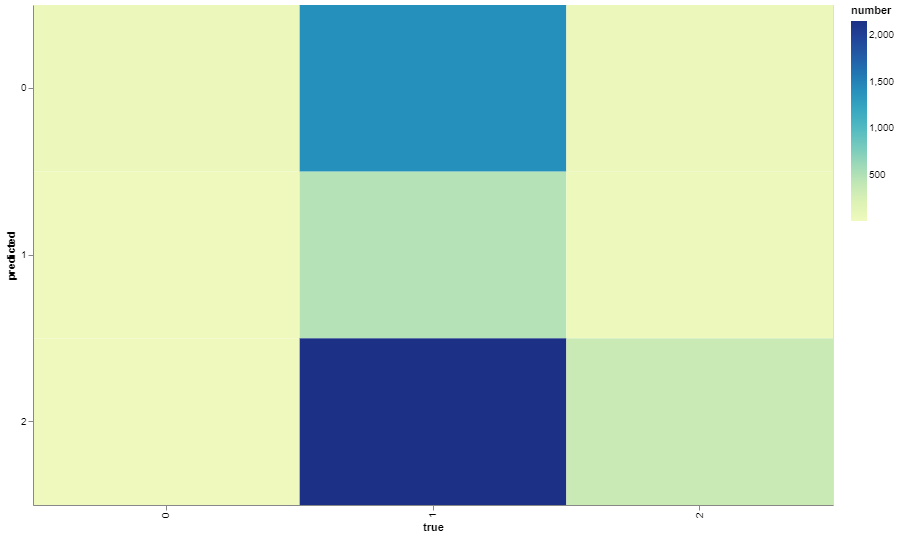

In [33]:
x, y = np.meshgrid(range(0, 3), range(0, 3))
source = pd.DataFrame({"true": x.ravel(), "predicted": y.ravel(), "number": cm.ravel()})
chart = (
    alt.Chart(source)
    .mark_rect()
    .encode(x="true:O", y="predicted:O", color="number:Q", tooltip=["number"])
    .interactive()
    .properties(width=800, height=500)
)
chart

## Analysis with negative workds marking

In [36]:
sentiment_by_words_with_negation = pd.read_csv("data/sentiment_by_review_words_with_negation.tsv", sep="\t")

In [38]:
ratings = list(sentiment_by_words_with_negation["rating"])
reviews = list(sentiment_by_words_with_negation["review"])
reviews = [str(e) for e in reviews]
sentiment = list(sentiment_by_words_with_negation["sentiment_by_review_words_with_negation"])

In [39]:
rating_classes = [classify_rating(rating) for rating in ratings]
sentiment_values = [classify_sentiment(sent) for sent in sentiment]

In [40]:
acc = accuracy_score(rating_classes, sentiment_values)
print(acc)

0.21755555555555556


In [41]:
target_names = ["negative", "neutral", "positive"]
print(
    classification_report(rating_classes, sentiment_values, target_names=target_names)
)

              precision    recall  f1-score   support

    negative       0.67      0.11      0.19      1500
     neutral       0.12      0.88      0.21       500
    positive       0.82      0.15      0.25      2500

    accuracy                           0.22      4500
   macro avg       0.54      0.38      0.22      4500
weighted avg       0.69      0.22      0.23      4500



In [42]:
cm = confusion_matrix(rating_classes, sentiment_values, labels=target_names)
cm

array([[ 171, 1275,   54],
       [  31,  442,   27],
       [  52, 2082,  366]], dtype=int64)

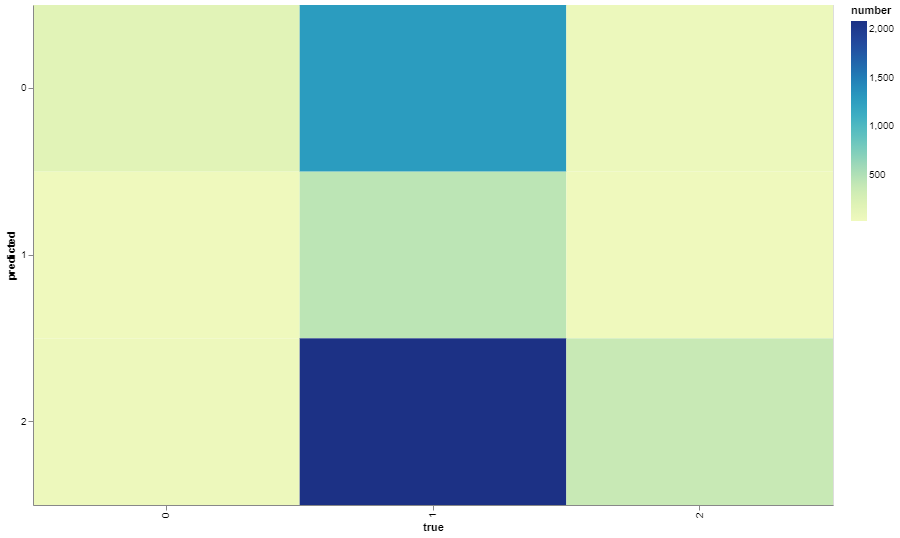

In [43]:
x, y = np.meshgrid(range(0, 3), range(0, 3))
source = pd.DataFrame({"true": x.ravel(), "predicted": y.ravel(), "number": cm.ravel()})
chart = (
    alt.Chart(source)
    .mark_rect()
    .encode(x="true:O", y="predicted:O", color="number:Q", tooltip=["number"])
    .interactive()
    .properties(width=800, height=500)
)
chart

## Report

* Sentiment just based on words gave about 0.19 accuracy and with negation usage its increased to 0.21
* Sentiment calcualton for the neutral is poor for both word based an words with negation dictionary based sentiment analysis
* In both scenarios recall is very low for negative and positive classes while precision is low for neutral class
* Overall I think the dictionary based sentiment analysis is poor considering the accuracy measure itself.